## The data block API

`data block` API 允许您自定义创建DataBunch通过

`data block` API允许您通过在单独的块中隔离该进程的底层部分来自定义DataBunch的创建，主要是：

1. Where are the inputs and how to create them?
2. How to split the data into a training and validation sets?
3. How to label the inputs?
4. What transforms to apply?
5. How to add a test set?
6. How to wrap in dataloaders and create the DataBunch

这些中的每一个都可以通过专为您独特设置而设计的特定块来解决。 您的输入可能位于文件夹，csv文件或数据框中。 您可能希望通过某些索引或根据它们所在的文件夹随机拆分它们。您可以在csv文件或数据框中放置标签，但它可能来自文件夹或输入的特定功能。 您可以选择是否添加数据扩充。 测试集也是可选的。 最后，您必须设置参数以将数据放在DataBunch中（批量大小，整理函数...）

数据块API就是这样调用的，因为您可以将这些块中的每一个与其他块混合搭配，从而可以灵活地创建自定义DataBunch以进行培训，验证和测试。 各种DataBunch的工厂方法非常适合初学者，但您无法始终使数据适合他们所需的轨道。

像往常一样，我们将从端到端示例开始，然后切换到每个部分的详细信息。

## Examples of use
Let's begin with our traditional MNIST example.

In [1]:
from fastai.vision import *
from fastai.basics import *
from fastai.callbacks import *

In [2]:
path = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)
path.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [3]:
(path/'train').ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train/3'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train/7')]

在vision.data中，我们只需键入以下内容即可创建适合图像分类的DataBunch：

In [4]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=64)

C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be remove

C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be remove

这是一种快捷方法，针对ImageNet样式后的文件夹中的数据，包括train和valid目录，每个目录包含一个子目录，其中所有标记的图片都是。 还有一个包含未标记图片的测试目录。

这是相同的代码，但这次使用的数据块API可以使用任何样式的数据集。 所有阶段，将在下面解释，可以这样组合在一起：

In [5]:
data = (ImageList.from_folder(path)     #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch

C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be remove

C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be remove

现在我们可以看一下创建的DataBunch：

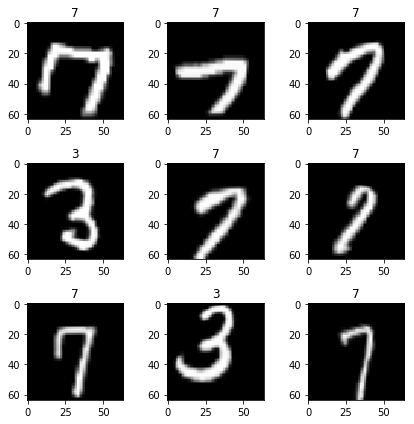

In [6]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

让我们看一下来自vision.data的另一个带有行星数据集的例子。 这次，它是csv文件中标签的多分类问题，并且在有效数据和列车数据之间没有给定的分割，因此我们使用随机分割。 工厂方法是：

In [7]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [8]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [9]:
data = ImageDataBunch.from_csv(planet, folder='train', size=128, suffix='.jpg', label_delim = ' ', ds_tfms=planet_tfms)

使用数据块API，我们可以像这样重写：

In [10]:
planet.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/planet_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/planet_tiny/train')]

In [11]:
pd.read_csv(planet/"labels.csv").head()

,image_name,tags
0,train_31112,clear primary
1,train_4300,partly_cloudy primary water
2,train_39539,clear primary water
3,train_12498,agriculture clear primary road
4,train_9320,clear primary


In [12]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        #Where to find the data? -> in planet 'train' folder
        .split_by_rand_pct()
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(label_delim=' ')
        #How to label? -> use the second column of the csv file and split the tags by ' '
        .transform(planet_tfms, size=128)
        #Data augmentation? -> use tfms with a size of 128
        .databunch())                          
        #Finally -> use the defaults for conversion to databunch

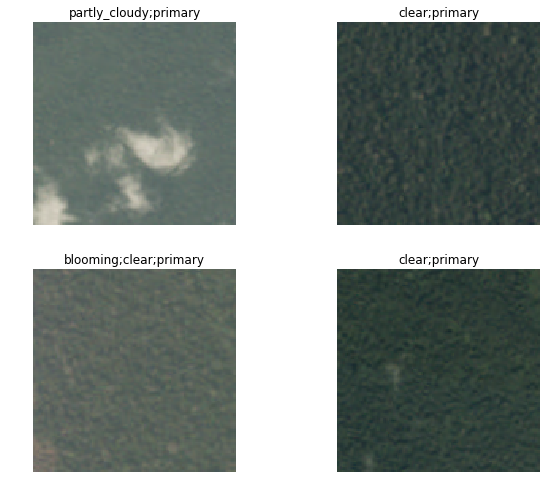

In [13]:
data.show_batch(rows=2, figsize=(9,7))

数据块API还允许您将数据集中在没有直接ImageDataBunch工厂方法的问题中。 例如，对于分段任务，我们可以使用它快速获取DataBunch。 我们以camvid数据集为例。 图像位于“图像”文件夹中，其对应的蒙版位于“标签”文件夹中。

In [14]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

我们有一个文件，它为我们提供了类的名称（掩码中每个代码对应的内容：行人，树，道路......）

In [15]:
camvid.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/camvid_tiny/codes.txt'),
 WindowsPath('C:/Users/Yang/.fastai/data/camvid_tiny/images'),
 WindowsPath('C:/Users/Yang/.fastai/data/camvid_tiny/labels')]

In [16]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

我们定义了以下函数，从图像文件名中推断出掩码文件名。

In [17]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

然后我们可以使用数据块API轻松定义DataBunch。 这里我们需要在变换调用中使用tfm_y = True，因为我们需要将相同的变换应用于目标掩码，就像应用于图像一样。 附注：为了进一步控制目标上使用的转换，每个转换都有一个use_on_y参数

In [18]:
data = (SegmentationItemList.from_folder(path_img)
        #Where to find the data? -> in path_img and its subfolders
        .split_by_rand_pct()
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_fn, classes=codes)
        #How to label? -> use the label function on the file name of the data
        .transform(get_transforms(), tfm_y=True, size=128)
        #Data augmentation? -> use tfms with a size of 128, also transform the label images
        .databunch())
        #Finally -> use the defaults for conversion to databunch

C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be remove

C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be remove

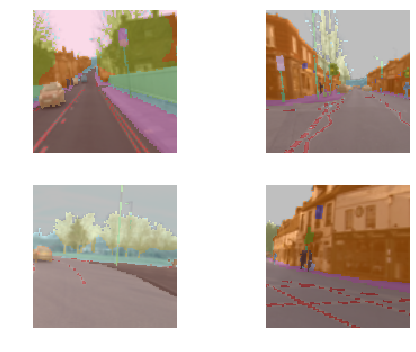

In [19]:
data.show_batch(rows=2, figsize=(7,5))

物体检测的另一个例子。 我们在这里使用我们的COCO数据集的小样本。 库中有一个辅助函数，用于读取注释文件并返回图像列表名称，其中包含与之关联的标记bbox列表。 我们将它转换为一个字典，用于映射图像名称和它们的bbox，然后编写将为每个图像文件名提供目标的函数。

In [20]:
coco = untar_data(URLs.COCO_TINY)
images, lbl_bbox = get_annotations(coco/'train.json')
img2bbox = dict(zip(images, lbl_bbox))
get_y_func = lambda o:img2bbox[o.name]

以下代码与我们之前看到的非常相似。 唯一的新增功能是使用特殊功能批量整理样品。 这是因为我们的图像可能有多个边界框，因此我们需要将它们填充到最大数量的边界框。

In [21]:
data = (ObjectItemList.from_folder(coco)
        #Where are the images? -> in coco and its subfolders
        .split_by_rand_pct()                          
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_func)
        #How to find the labels? -> use get_y_func on the file name of the data
        .transform(get_transforms(), tfm_y=True)
        #Data augmentation? -> Standard transforms; also transform the label images
        .databunch(bs=16, collate_fn=bb_pad_collate))   
        #Finally we convert to a DataBunch, use a batch size of 16,
        # and we use bb_pad_collate to collate the data into a mini-batch

C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be removed in the next release. Please use torch.solve instead.
  return torch.gesv(B,A)[0][:,0]
C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\vision\transform.py:243: UserWarning: torch.gesv is deprecated in favour of torch.solve and will be remove

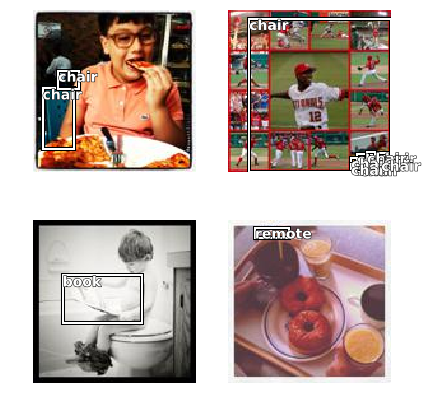

In [22]:
data.show_batch(rows=2, ds_type=DatasetType.Valid, figsize=(6,6))

但是视觉并不是数据块API工作的唯一应用。 它还可以用于文本和表格数据。 通过我们的IMDB数据集样本（在csv文件中标记为文本），以下是如何将语言模型的数据组合在一起。

In [23]:
from fastai.text import *

In [24]:
imdb = untar_data(URLs.IMDB_SAMPLE)

In [25]:
data_lm = (TextList
           .from_csv(imdb, 'texts.csv', cols='text')
           #Where are the text? Column 'text' of texts.csv
           .split_by_rand_pct()
           #How to split it? Randomly with the default 20% in valid
           .label_for_lm()
           #Label it for a language model
           .databunch())
           #Finally we convert to a DataBunch

In [26]:
data_lm.show_batch()

idx,text
0,"! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk ! xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is"
1,"n't change very much throughout the show . xxmaj their relationship grew , but they did n't really . xxmaj still , a fun time had by all ( xxmaj even for xxmaj xxunk ! ) . xxbos xxmaj have you ever sat watching a movie when 20 or 30 minutes have gone by and suddenly you realize that you have actually seen the movie before ? xxmaj that happened"
2,"values ( sets , costumes , etc . ) are quite good , and this greatly enhances its camp value . xxmaj in a strange way it is actually quite funny , simply because it tries to be serious and fails so badly . xxbos xxmaj this film is brilliant ! xxmaj it touches everyone who sees it in an extraordinary way . xxmaj it really takes you back to"
3,"story . xxmaj wells ' description of the xxmaj martians  a giant head xxunk on numerous xxunk  is effectively portrayed . xxmaj when the xxmaj xxunk machines appear , about an hour into the film , they too give a good impression of how xxmaj wells described them . xxmaj both xxmaj wells and this film do an excellent job of portraying the progress of the xxmaj martians"
4,"like that ever will happen . \n \n xxmaj so is "" xxmaj higher xxmaj learning "" overly dramatic ? xxmaj exaggerated ? xxmaj maybe . xxmaj is it way "" off mark ? "" xxmaj it depends on where you went to or go to school . xxmaj the race thing where the xxunk just hang around with their own xxup does happen . xxmaj xxunk the xxmaj"


对于分类问题，我们只需要改变标记的完成方式。 这里我们使用csv列标签。

In [27]:
data_clas = (TextList.from_csv(imdb, 'texts.csv', cols='text')
                   .split_from_df(col='is_valid')
                   .label_from_df(cols='label')
                   .databunch())

In [28]:
data_clas.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj xxunk for weeks before i watched it . i xxunk a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj xxunk . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj xxunk",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first xxunk games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - xxunk gaming experience in general . xxmaj with graphics",positive


最后，对于表格数据，我们只需将我们的分类和连续变量的名称作为额外参数传递。 我们还添加了一些PreProcessors，它们将在分割和标记完成后应用于我们的数据。

In [29]:
from fastai.tabular import *

In [30]:
adult = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(adult/'adult.csv')
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_names = ['education-num', 'hours-per-week', 'age', 'capital-loss', 'fnlwgt', 'capital-gain']
procs = [FillMissing, Categorify, Normalize]

In [31]:
data = (TabularList.from_df(df, path=adult, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx=range(800,1000))
                           .label_from_df(cols=dep_var)
                           .databunch())

In [32]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num_na,education-num,hours-per-week,age,capital-loss,fnlwgt,capital-gain,target
Private,Some-college,Never-married,Exec-managerial,Own-child,White,Female,United-States,False,-0.0312,-2.4656,-1.3624,-0.2164,0.2419,-0.1459,<50k
Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States,False,1.1422,1.1793,-0.8493,-0.2164,1.9455,-0.1459,<50k
Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States,False,1.1422,-0.0356,-0.0430,-0.2164,-0.7426,0.8923,>=50k
Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,False,-0.4224,-0.0356,-0.6294,-0.2164,-1.4304,-0.1459,<50k
Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,False,-0.0312,-2.0606,1.5695,-0.2164,0.0315,-0.1459,<50k


## 第1步：提供输入
获取输入的基本类是以下类。 它也是包含所有标签的同一个类（因此名称为ItemList）。

<b>class ItemList</b>

`ItemList(items:Iterator[T_co], path:PathOrStr='.', label_cls:Callable=None, inner_df:Any=None, processor:Union[PreProcessor, Collection[PreProcessor]]=None, x:ItemList=None, ignore_empty:bool=False)`

带有__len__和__getitem__的项目集合，带有ndarray索引语义。

此类重新组合项目中模型的输入并保存路径属性，该属性是查找任何文件的位置（图像文件，带标签的csv文件......）。 将调用label_cls以根据label函数的结果创建标签，inner_df是基础数据框，处理器将在拆分和标记后应用于输入。

它有多个子类，具体取决于您正在处理的数据类型。 这是一个快速列表：

* 分类标签的CategoryList
* MultiCategoryList表示多分类问题的标签
* FloatList用于回归问题中的浮点标签
* ImageList表示作为图像的数据
* SegmentationItemList与ImageList类似，但默认标签为SegmentationLabelList
* 用于分段掩码的SegmentationLabelList
* ObjectItemList与ImageList类似，但默认标签为ObjectLabelList
* 用于对象检测的ObjectLabelList
* PointsItemList for points（ImagePoints类型）
* 用于图像到图像任务的ImageImageList
* TextList用于文本数据
* 存储在文件中的文本数据的TextList
* TabularList表格数据
* 用于协同过滤的CollabList

我们可以通过以下代码示例稍微了解ItemList的基本属性和方法的行为。

In [33]:
from fastai.vision import *
path_data = untar_data(URLs.MNIST_TINY)
il_data = ItemList.from_folder(path_data, extensions=['.csv'])
il_data

ItemList (1 items)
C:\Users\Yang\.fastai\data\mnist_tiny\labels.csv
Path: C:\Users\Yang\.fastai\data\mnist_tiny

以下是如何访问ItemList的路径以及路径中的实际项目（此处为文件）。

In [34]:
il_data.path

WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny')

In [35]:
il_data.items

array([WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv')], dtype=object)

len（il_data）为您提供il_data中的文件计数，您可以使用索引访问各个项目。

In [36]:
len(il_data)

1

ItemList返回具有单个索引的单个项目，但如果给定索引列表，则返回ItemList。

In [37]:
il_data[0]

WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv')

In [38]:
il_data[:1]

ItemList (1 items)
C:\Users\Yang\.fastai\data\mnist_tiny\labels.csv
Path: C:\Users\Yang\.fastai\data\mnist_tiny

使用il_data.add，我们可以执行in_place连接另一个ItemList对象。

In [39]:
il_data.add(il_data); il_data

ItemList (2 items)
C:\Users\Yang\.fastai\data\mnist_tiny\labels.csv,C:\Users\Yang\.fastai\data\mnist_tiny\labels.csv
Path: C:\Users\Yang\.fastai\data\mnist_tiny

In [40]:
from fastai.vision import *

In [41]:
path_data = untar_data(URLs.MNIST_TINY); path_data.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [42]:
itemlist = ItemList.from_folder(path_data/'test')
itemlist

ItemList (20 items)
C:\Users\Yang\.fastai\data\mnist_tiny\test\1503.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\1605.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\1883.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\2032.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\205.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny\test

我们可以看到，默认情况下，文件不会以字母数字顺序返回。 在上面：1503.png，... 617.png，585.png ......

当您始终使用同一台机器时，这是可以的，因为相同的数据集应以相同的顺序返回。 但是当在一台机器上建立一个数据块（比如GCP），然后将相同的代码移植到另一台机器（比如你的笔记本电脑）时，相同的数据集和代码可能会以不同的顺序返回文件。

由于所有随机操作都使用数据集的加载顺序作为起点，因此您将无法复制任何随机操作，即将数据随机拆分为80％train，以及20％validation，即使在正确播种时也是如此。

解决方案是在.`from_folder（）`方法中使用`presort = True`。 如下所示，启用该参数后，文件将按升序返回，并且此行为将跨机器和跨平台匹配。 现在，您可以在已加载的数据上重现任何随机操作。

In [43]:
#??? 没有找到presort = True
itemlist = ItemList.from_folder(path_data/'test')
itemlist

ItemList (20 items)
C:\Users\Yang\.fastai\data\mnist_tiny\test\1503.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\1605.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\1883.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\2032.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\205.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny\test

如何生成上述输出？

在幕后，执行itemlist调用ItemList .__ repr__，它基本上打印出itemlist [0]到itemlist [4]

In [44]:
itemlist[0]

WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/1503.png')

和itemlist [0]基本上调用itemlist.get（0），它返回itemlist.items [0]。 这就是为什么我们有如上所述的输出。

选择合适的类后，可以使用以下工厂方法之一对其进行实例化

<b>from_folder</b>

`from_folder(path:PathOrStr, extensions:StrList=None, recurse:bool=True, include:OptStrList=None, processor:Union[PreProcessor, Collection[PreProcessor]]=None, presort:Optional[bool]=False, **kwargs) → ItemList`

在具有扩展名后缀的文件名的路径中创建ItemList。 recurse确定我们是否搜索子文件夹。

In [45]:
path = untar_data(URLs.MNIST_TINY)
path.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [46]:
ImageList.from_folder(path)

ImageList (1428 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny

path是您的根数据文件夹。 在路径目录中，您有train和valid文件夹，其中包含您的图像。

<b>from_df</b>

`from_df(df:DataFrame, path:PathOrStr='.', cols:IntsOrStrs=0, processor:Union[PreProcessor, Collection[PreProcessor]]=None, **kwargs) → ItemList`

从`df`的`cols`中的输入创建Path中的`ItemList`。

Dataframe有2列。 第一列是图像的路径，第二列包含该图像的标签ID。 如果您有多个标签（即单个图像的多个标签），您将在标签列中有一个空格（由label_from_df的label_delim参数确定）分隔的字符串。

from_df和from_csv可以更通用的方式使用。 如果您无法弄清楚如何获取ImageList，则可以很容易地制作具有上述格式的csv文件。

如何设置路径？ path指的是根数据目录。 因此，csv文件中的路径应该相对于路径而不是绝对路径。 在下面的示例中，在labels.csv中，图像的路径是path + train/3/7463.png

In [47]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/export.pkl'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/item_list.txt'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/trained_model.pkl'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/valid')]

In [48]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [49]:
ImageList.from_df(df, path)

ImageList (14434 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample

<b>from_csv</b>

`from_csv(path:PathOrStr, csv_name:str, cols:IntsOrStrs=0, delimiter:str=None, header:str='infer', processor:Union[PreProcessor, Collection[PreProcessor]]=None, **kwargs) → ItemList`

从Path/csv_name中的`cols`作为输入创建路径中的项目列表

In [50]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/export.pkl'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/item_list.txt'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/trained_model.pkl'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_sample/valid')]

In [51]:
ImageList.from_csv(path, 'labels.csv')

ImageList (14434 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample

<b>可选步骤：过滤数据</b>

工厂方法可能抓取了太多项目。 例如，如果您使用from_folder方法搜索子文件夹，则可能获得了不需要的文件。 要删除它们，您可以使用以下方法之一。

<b>filter_by_func</b>

`filter_by_func(func:Callable) → ItemList`

仅保留func返回True的元素。

In [52]:
path = untar_data(URLs.MNIST_SAMPLE)
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


假设您只想保留带有后缀“.png”的图像。 好吧，这种方法会为你做出魔力。

In [53]:
Path(df.name[0]).suffix

'.png'

In [54]:
ImageList.from_df(df, path).filter_by_func(lambda fname: Path(fname).suffix == '.png')

ImageList (14434 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample

<b>filter_by_folder</b>

`filter_by_folder(include=None, exclude=None)`

只保留include文件夹中的文件名或拒绝排除的文件名。

<b>filter_by_rand</b>

`filter_by_rand(p:float, seed:int=None)`

保留具有概率p和可选种子的项目的随机样本。

In [55]:
path = untar_data(URLs.MNIST_SAMPLE)
ImageList.from_folder(path).filter_by_rand(0.5)

ImageList (7254 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample

将项目数与未使用过滤器创建的列表进行对比。

In [56]:
ImageList.from_folder(path)

ImageList (14434 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample

<b>to_text</b>

`to_text(fn:str)`

将self.items保存到self.path中的fn。

In [57]:
path = untar_data(URLs.MNIST_SAMPLE)
pd.read_csv(path/'labels.csv').head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [58]:
file_name = "item_list.txt"
ImageList.from_folder(path).to_text(file_name)

<b>use_partial_data</b>

`use_partial_data(sample_pct:float=0.01, seed:int=None) → ItemList`

仅使用完整数据集的sample_pct样本和可选种子。

In [59]:
path = untar_data(URLs.MNIST_SAMPLE)
ImageList.from_folder(path).use_partial_data(0.5)

ImageList (7217 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample

将项目数与未使用过滤器创建的列表进行对比。

In [60]:
ImageList.from_folder(path)

ImageList (14434 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample

<b>编写自己的ItemList</b>

首先检查您是否无法通过以下方式轻松自定义现有子类之一：

* 继承现有的并替换get方法（如果处理图像，则替换open方法）
* 应用自定义处理器（参见步骤4）
* 更改标签创建的默认label_cls
* 使用_processor类变量添加默认的PreProcessor
如果不是这种情况，并且您确实需要编写自己的类，那么有一个完整的教程可以解释如何继续。

<b>analyze_pred</b>

`analyze_pred(pred:Tensor)`

在重建之前调用pred进行额外的预处理。

<b>get</b>

`get(i) → Any`

如果要自定义如何从self.items创建项目i。

我们将瞥见如何使用以下演示。


In [61]:
path_data = untar_data(URLs.MNIST_TINY); path_data.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [62]:
il_data_base = ItemList.from_folder(path=path_data, extensions=['.png'], include=['test'])
il_data_base

ItemList (20 items)
C:\Users\Yang\.fastai\data\mnist_tiny\test\1503.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\1605.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\1883.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\2032.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\205.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny

get在il_data_base [15]中不明确地使用。 il_data_base.get（15）在这里给出相同的结果，因为它的defulat是返回它。

In [63]:
il_data_base[15]

WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/617.png')

但是，在创建自定义ItemList时，您可以覆盖此功能以对项目执行某些操作（例如打开图像）。

In [64]:
il_data_image = ImageList.from_folder(path=path_data, extensions=['.png'], include=['test'])
il_data_image

ImageList (20 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny

同样，通常在il_data_image [15]中明确使用get。

In [65]:
il_data_image[15]

ImageList.get覆盖ItemList.get并使用ImageList.open打印图像的原因是打印图像而不是FilePath对象。

<b>new</b>

`new(items:Iterator[T_co], processor:Union[PreProcessor, Collection[PreProcessor]]=None, **kwargs) → ItemList`

从项目创建新的ItemList，保持相同的属性。

你永远不需要正常地对它进行子类化，只是不要忘记在每次在__init__中调用new时需要复制的self.copy_new参数的名称。

我们将通过以下示例了解新的工作方式。

In [66]:
path_data = untar_data(URLs.MNIST_TINY); path_data.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [67]:
itemlist1 = ItemList.from_folder(path=path_data/'valid', extensions=['.png'])
itemlist1

ItemList (699 items)
C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7006.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7010.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7024.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7026.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7040.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny\valid

正如您将在下面看到的，copy_new允许使用从itemlist1借用任何参数及其值，而itemlist1.new（itemlist1.items）允许我们使用copy_new中的项和参数通过调用ItemList .__ init__来创建另一个ItemList。

In [68]:
itemlist1.copy_new == ['x', 'label_cls', 'path']

True

In [69]:
((itemlist1.x == itemlist1.label_cls == itemlist1.inner_df == None) 
 and (itemlist1.path == Path('/Users/Natsume/.fastai/data/mnist_tiny/valid')))

False

您可以从项目列表.__ init__签名中选择任何参数并更改其值。

In [70]:
itemlist1.copy_new = ['x', 'label_cls', 'path', 'inner_df']
itemlist1.x = itemlist1.label_cls = itemlist1.path = itemlist1.inner_df = 'test'
itemlist2 = itemlist1.new(items=itemlist1.items)

In [71]:
(itemlist2.inner_df == itemlist2.x == itemlist2.label_cls == 'test' 
and itemlist2.path == Path('test'))

True

<b>reconstruct</b>

`reconstruct(t:Tensor, x:Tensor=None)`

重建其数据的基础项之一。

## 第2步：在训练集和验证集之间拆分数据

这一步通常很简单，您只需根据需要选择以下功能之一即可。

<b>split_none</b>

`split_none()`

不要拆分数据并创建一个空的验证集。

<b>split_by_rand_pct</b>

`split_by_rand_pct(valid_pct:float=0.2, seed:int=None) → ItemLists`

通过将valid_pct放入验证集中随机拆分项目，可以传递可选的种子。

<b>split_subsets</b>

`split_subsets(train_size:float, valid_size:float, seed=None) → ItemLists`

将项目拆分为训练集，其大小为train_size * n，有效集合的大小为valid_size * n。

如果您想使用特定大小的子集，此功能非常方便，例如，您希望将20％的数据用于验证数据集，但您只想训练其余数据的一小部分：split_subsets（ train_size = 0.08，valid_size = 0.2）。

<b>split_by_files</b>

`split_by_files(valid_names:ItemList) → ItemLists`

使用valid_names中的名称拆分数据以进行验证。

<b>split_by_fname_file</b>

`split_by_fname_file(fname:PathOrStr, path:PathOrStr=None) → ItemLists`

使用fname中的名称为验证集拆分数据。 path将覆盖self.path。

内部调用split_by_files。 fname包含像0001.png这样的图像文件名。

<b>split_by_folder</b>

`split_by_folder(train:str='train', valid:str='valid') → ItemLists`

根据文件名所在的文件夹（`train` or `valid`）拆分数据。

`注意：此方法在`self.path`之后立即查看`valid`和`train`的文件夹。`

基本上，split_by_folder接收两个文件夹名称（以下示例中为“train”和“valid”），以将大型ImageList拆分为两个较小的ImageLists，一个用于训练集，另一个用于验证集。 两个ImageLists都附加到一个大型ItemLists，它是split_by_folder的最终输出。

In [72]:
path_data = untar_data(URLs.MNIST_TINY); path_data.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [73]:
il = ItemList.from_folder(path=path_data); il

ItemList (1430 items)
C:\Users\Yang\.fastai\data\mnist_tiny\labels.csv,C:\Users\Yang\.fastai\data\mnist_tiny\models\tmp.pth,C:\Users\Yang\.fastai\data\mnist_tiny\test\1503.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\1605.png,C:\Users\Yang\.fastai\data\mnist_tiny\test\1883.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny

In [74]:
sd = il.split_by_folder(train='train', valid='valid'); sd

ItemLists;

Train: ItemList (709 items)
C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7030.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7031.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7043.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7046.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: ItemList (699 items)
C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7006.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7010.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7024.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7026.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7040.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

在幕后，split_by_folder使用_get_by_folder（name）将“train”和“valid”文件夹转换为两个索引列表，并将它们传递给split_by_idxs以将il拆分为两个ImageLists，最后附加到ItemLists。

In [75]:
train_idx = il._get_by_folder(name='train')
train_idx[:5], train_idx[-5:], len(train_idx)

([22, 23, 24, 25, 26], [726, 727, 728, 729, 730], 709)

In [76]:
valid_idx = il._get_by_folder(name='valid') 
valid_idx[:5], valid_idx[-5:],len(valid_idx)

([731, 732, 733, 734, 735], [1425, 1426, 1427, 1428, 1429], 699)

顺便说一句，_get_by_folder（name）按以下方式工作，首先，索引整个il.items，循环每个项目，如果一个项目属于命名文件夹，例如'train'，则将其放入列表中。 文件夹名称是唯一的输入，输出是列表。

<b>split_by_idx</b>

`split_by_idx(valid_idx:Collection[int]) → ItemLists`

根据valid_idx中的索引拆分数据。

In [77]:
path = untar_data(URLs.MNIST_SAMPLE)
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


您可以传递要放在验证集中的索引列表，如[1,3,10]。 或者你可以传递一个连续的列表，如列表（范围（1000））

In [78]:
data = (ImageList.from_df(df, path)
                 .split_by_idx(list(range(1000))))
data

ItemLists;

Train: ImageList (13434 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample;

Valid: ImageList (1000 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample;

Test: None

<b>split_by_idxs</b>

`split_by_idxs(train_idx, valid_idx)`

在train_idx和valid_idx之间拆分数据。

在幕后，split_by_idxs将两个索引列表（`train_idx`和`valid_idx`）转换为两个ImageLists，然后传递到split_by_list以将il拆分为两个ImageLists并附加到ItemLists。

In [79]:
sd = il.split_by_idxs(train_idx=train_idx, valid_idx=valid_idx); sd

ItemLists;

Train: ItemList (709 items)
C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7030.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7031.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7043.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7046.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: ItemList (699 items)
C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7006.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7010.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7024.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7026.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7040.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

<b>split_by_list</b>

`split_by_list(train, valid)`

在`train`和`valid`之间拆分数据。

split_by_list接收两个ImageLists，在下面的例子中是il [train_idx]和il [valid_idx]，并将它们传递给_split（ItemLists）以初始化ItemLists对象，该对象基本上接受训练，valiation和测试（可选）ImageLists 它的属性。

In [80]:
sd = il.split_by_list(train=il[train_idx], valid=il[valid_idx]); sd

ItemLists;

Train: ItemList (709 items)
C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7030.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7031.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7043.png,C:\Users\Yang\.fastai\data\mnist_tiny\train\3\7046.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: ItemList (699 items)
C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7006.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7010.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7024.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7026.png,C:\Users\Yang\.fastai\data\mnist_tiny\valid\3\7040.png
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

这更像是一种内部方法，如果要传递验证集的文件名列表，则应该使用split_by_files。

<b>split_by_valid_func</b>

`split_by_valid_func(func:Callable) → ItemLists`

按func结果拆分数据（对于验证集返回True）。

<b>split_from_df</b>

`split_from_df(col:IntsOrStrs=2)`

从self.inner_df中的数据框中的col中拆分数据。

要使用此函数，您需要一个布尔列is_valid。 如果is_valid [index] = True，则将该示例放入验证集中，如果is_valid [index] = False，则将示例放入训练集中。

In [81]:
path = untar_data(URLs.MNIST_SAMPLE)
df = pd.read_csv(path/'labels.csv')

# Create a new column for is_valid
df['is_valid'] = [True]*(df.shape[0]//2) + [False]*(df.shape[0]//2)

# Randomly shuffle dataframe
df = df.reindex(np.random.permutation(df.index))
print(df.shape)
df.head()

(14434, 3)


,name,label,is_valid
4188,train/3/14686.png,0,True
1224,train/3/9226.png,0,True
7939,train/7/53836.png,1,False
6183,train/7/50360.png,1,True
8765,train/7/32571.png,1,False


In [82]:
data = (ImageList.from_df(df, path)
                 .split_from_df())
data

ItemLists;

Train: ImageList (7217 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample;

Valid: ImageList (7217 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_sample;

Test: None

`警告：此方法假定数据是从csv文件或数据框创建的。`

## 第3步：标记输入

要标记输入，请使用以下功能之一。 请注意，即使它不在文档化的参数中，您也可以始终传递将用于创建这些标签的label_cls（默认值是输入ItemList中的标签，如果没有，则会转到CategoryList，MultiCategoryList或 FloatList取决于标签的类型）。 这在以下函数中实现：

<b>get_label_cls</b>

`get_label_cls(labels, label_cls:Callable=None, label_delim:str=None, **kwargs)`

返回label_cls或从标签的第一个元素中猜出一个。

在幕后，ItemList.get_label_cls基本上根据标签的项类型选择标签类，而标签可以是Collection，pandas.core.frame.DataFrame，pandas.core.series.Series中的任何一个。 如果列表元素的类型为字符串或整数，则get_label_cls将输出CategoryList; 它们是float类型，然后输出FloatList; 如果它们是Collection类型，那么它将输出MultiCateogryList。



In [83]:
from fastai.vision import *

In [84]:
path_data = untar_data(URLs.MNIST_TINY)
sd = ImageList.from_folder(path_data).split_by_folder('train', 'valid'); sd

ItemLists;

Train: ImageList (709 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: ImageList (699 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

In [85]:
labels = ['7', '3']
label_cls = sd.train.get_label_cls(labels); label_cls

fastai.data_block.CategoryList

In [86]:
labels = [7, 3]
label_cls = sd.train.get_label_cls(labels); label_cls

fastai.data_block.CategoryList

In [87]:
labels = [7.0, 3.0]
label_cls = sd.train.get_label_cls(labels); label_cls

fastai.data_block.FloatList

In [88]:
labels = [[7, 3],]
label_cls = sd.train.get_label_cls(labels); label_cls

fastai.data_block.MultiCategoryList

In [89]:
labels = [['7', '3'],]
label_cls = sd.train.get_label_cls(labels); label_cls

fastai.data_block.MultiCategoryList

如果没有传递label_cls参数，通常可以根据数据推断出正确的标签类型（用于分类或回归）。 如果您有多个回归目标（例如，从单个图像/文本预测5个不同的数字），请注意浮动数组默认被认为是单热编码分类的目标。 如果您的任务是回归，请确保传递label_cls = FloatList，以便从您的databunch创建的学习者正确初始化。

这些文档中的第一个示例创建了如下标签：

In [90]:
path = untar_data(URLs.MNIST_TINY)
ll = ImageList.from_folder(path).split_by_folder().label_from_folder().train

如果要保存重新创建LabelList所需的数据（不包括保存实际的图像/文本/ etc文件），可以使用to_df或to_csv：

In [91]:
#train.to_csv('tmp.csv')

或者直接抓住pd.DataFrame：

In [92]:
ll.to_df().head()

,x,y
0,train\3\7.png,3
1,train\3\7030.png,3
2,train\3\7031.png,3
3,train\3\7043.png,3
4,train\3\7046.png,3


<b>label_empty</b>

`label_empty(**kwargs)`

使用EmptyLabel标记每个项目。

<b>label_from_df</b>

`label_from_df(cols:IntsOrStrs=1, label_cls:Callable=None, **kwargs)`

从self.inner_df中cols中的值标记self.items。

`警告：此方法仅适用于使用`from_csv`或`from_df`方法创建的数据对象。`

<b>label_const</b>

`label_const(const:Any=0, label_cls:Callable=None, **kwargs) → LabelList`

使用const标记每个项目。

<b>label_from_folder</b>

`label_from_folder(label_cls:Callable=None, **kwargs) → LabelList`

根据文件夹为每个文件名添加标签。

`注意：此方法查看路径中的最后一个子文件夹以确定类。`

在幕后，当ItemList调用label_from_folder时，它会创建一个lambda函数，该函数输出文件Path对象直接或直接属于的foldername，然后使用lambda函数作为输入调用label_from_func。

在实际和高级别上，label_from_folder主要用于ItemLists而不是ItemList以简化和提高效率，有关详细信息，请参阅ItemLists上的label_from_folder示例。 即使您只需要训练集ItemList，仍然需要使用split_none来创建ItemLists，然后使用label_from_folder进行标记，如下所示。

In [93]:
from fastai.vision import *

In [94]:
path_data = untar_data(URLs.MNIST_TINY); path_data.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [95]:
sd_train = ImageList.from_folder(path_data/'train').split_none()
ll_train = sd_train.label_from_folder(); ll_train

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Test: None

<b>label_from_func</b>

`label_from_func(func:Callable, label_cls:Callable=None, **kwargs) → LabelList`

将func应用于每个输入以获取其标签。

在label_from_func中，它将输入func应用于ItemList的每个项目，并将所有函数输出放入列表中，然后将列表传递到ItemList._label_from_list。 下面是使用label_from_func的简单示例。

In [96]:
from fastai.vision import *

In [97]:
path_data = untar_data(URLs.MNIST_TINY)
sd = ImageList.from_folder(path_data).split_by_folder('train', 'valid');sd

ItemLists;

Train: ImageList (709 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: ImageList (699 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

In [98]:
func=lambda o: (o.parts if isinstance(o, Path) else o.split(os.path.sep))[-2]

上面的lambda函数是访问文件Path对象的立即foldername。

In [99]:
ll = sd.label_from_func(func); ll

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

<b>label_from_re</b>

`label_from_re(pat:str, full_path:bool=False, label_cls:Callable=None, **kwargs) → LabelList`

应用`label_from_re`中的 pat来确定每个文件名的标签。 如果是full_path，请搜索全名。

### class CategoryList

`CategoryList(items:Iterator[T_co], classes:Collection[T_co]=None, label_delim:str=None, **kwargs) :: CategoryListBase`

基于ItemList的单分类标签。

ItemList适合于在属于类的项目中存储标签。 如果未传递，则将由唯一的不同标签确定类。 处理器将默认为CategoryProcessor。

CategoryList使用标签创建ItemList以处理分类标签。 在幕后，CategoryList是CategoryListBase的子类，它是ItemList的子类。 CategoryList从CategoryListBase继承属性，例如类（默认为None），filter_missing_y（默认为True），并且具有自己的唯一属性loss_func（默认为CrossEntropyFlat（）），以及它自己的类属性_processor（默认为CategoryProcessor）。

In [100]:
from fastai.vision import *

In [101]:
path_data = untar_data(URLs.MNIST_TINY)
ll = ImageList.from_folder(path_data).split_by_folder('train', 'valid').label_from_folder()
ll.train.y.items, ll.train.y.classes, ll.train.y[0]

(array([0, 0, 0, 0, ..., 1, 1, 1, 1], dtype=int64), ['3', '7'], Category 3)

In [102]:
cl = CategoryList(ll.train.y.items, ll.train.y.classes); cl

CategoryList (709 items)
3,3,3,3,3
Path: .

有关打印CategoryList对象或使用索引访问元素的行为，请参阅下面的CategoryList.get。

在幕后，当打印出CategoryList对象或cl [idx]时，不明确地使用CategoryList.get。 根据CategoryList.get的来源，每个项目用于获取自己的类。 当'classes'是一个字符串列表时，那么项的元素被用作列表的索引，因此它们必须是0到len（classes）-1范围内的整数; 如果classes是字典，那么项的元素将用作键，因此它们也可以是字符串。 请参阅下面的示例了解详情

In [103]:
from fastai.vision import *

In [104]:
items = np.array([0, 1, 2, 1, 0])
cl = CategoryList(items, classes=['3', '7', '9']); cl

CategoryList (5 items)
3,7,9,7,3
Path: .

In [105]:
items = np.array(['3', '7', '9', '7', '3'])
classes = {'3':3, '7':7, '9':9}
cl = CategoryList(items, classes); cl

CategoryList (5 items)
3,7,9,7,3
Path: .

### class MultiCategoryList

`MultiCategoryList(items:Iterator[T_co], classes:Collection[T_co]=None, label_delim:str=None, one_hot:bool=False, **kwargs) :: CategoryListBase`

多分类标签的基本ItemList。

它将存储属于类的项目中的标签列表。 如果未传递，则将由唯一的不同标签确定类。 sep用于分割标签列表中的项目内容。

如果one_hot = True，则项目包含一个热编码的标签。 在这种情况下，必须传递一个类列表（因为我们不能使用不同的标签）。

### class FloatList

`FloatList(items:Iterator[T_co], log:bool=False, classes:Collection[T_co]=None, **kwargs) :: ItemList`

ItemList适合存储用于回归的项目中的浮点数。 如果此标志为True，将添加日志。

### class EmptyLabelList

`EmptyLabelList(items:Iterator[T_co], path:PathOrStr='.', label_cls:Callable=None, inner_df:Any=None, processor:Union[PreProcessor, Collection[PreProcessor]]=None, x:ItemList=None, ignore_empty:bool=False) :: ItemList`

基于ItemList的假标签。

### 隐形步骤：预处理
这在API中没有看到，但是如果您在步骤1中在初始ItemList中传递了`processor `（或它们的列表），它将在此处应用。如果您没有传递任何处理器，则可能仍会创建它们的列表，具体取决于您的项目类的_processor变量中的内容（这可以是PreProcessor类的列表）。

处理器是在初始化时应用于所有输入的转换，其中在训练集上计算的状态随后在验证集（可能是测试集）上应用而无需修改。例如，它可以处理文本以进行标记，然后对它们进行数字化。在这种情况下，我们希望验证集的数值化与训练集的词汇表完全相同。

另一个例子是表格数据，其中我们用（例如）训练集上计算的中值填充缺失值。该统计信息存储在PreProcessor的内部状态中，并应用于验证集。

这是所有处理器的通用类。

### class PreProcessor
`PreProcessor(ds:Collection[T_co]=None)`

将应用于数据块API末尾的项目的处理器的基本类。

<b>process_one</b>

`process_one(item:Any)`

处理一个项目。 此方法需要在任何子类中编写。

<b>process</b>

`process(ds:Collection[T_co])`

ds：ItemList的对象
处理数据集。 此默认设置适用于ds的每个项目的process_one。

### class CategoryProcessor

`CategoryProcessor(ds:ItemList) :: PreProcessor`

PreProcessor，从ds.items创建类并处理映射。

<b>generate_classes</b>

`generate_classes(items)`

通过获取已排序的唯一值从项目生成类。

<b>process</b>

`process(ds)`

ds是CategoryList的对象。
它基本上生成一个唯一标签列表（分配给ds.classes）和一个字典映射类到索引（分配给ds.c2i）。

它是一个内部函数，仅用于在标记步骤后将处理器应用于训练，验证和测试数据集。

### class MultiCategoryProcessor

`MultiCategoryProcessor(ds:ItemList, one_hot:bool=False) :: CategoryProcessor`

PreProcessor，从ds.items创建类并处理映射。

<b>generate_classes</b>

`generate_classes(items)`

通过获取已排序的唯一值从项目生成类。

### 可选步骤

#### 添加变换
变换与处理器的不同之处在于它们在我们抓取一个项目时即时应用。 在随机变换的情况下，每次我们要求相同的项目时，它们也可能会发生变化。

<b>transform</b>

`transform(tfms:Optional[Tuple[Union[Callable, Collection[Callable]], Union[Callable, Collection[Callable]]]]=(None, None), **kwargs)`

设置要应用于train和validation的xs的tfms。

这是视觉应用的主要内容。 kwargs参数是您传递的变换类型所期望的参数。 tfm_y就是其中之一，如果设置为True，则变换将应用于输入和目标。

有关示例，请参阅：vision.transforms。

#### 添加测试集
要添加测试集，可以使用以下两种方法之一。

<b>add_test</b>

`add_test(items:Iterator[T_co], label:Any=None)`

添加包含具有任意标签的项目的测试集。

`注意：这里`items`可以是`ItemList`或集合。`

<b>add_test_folder</b>

`add_test_folder(test_folder:str='test', label:Any=None)`

添加包含test_folder项和任意标签的测试集。

`警告：在fastai中，测试集未标记！ 即使可用，也不会收集任何标签。
相反，传递的label参数或空标签将用于此数据集的所有条目（这是fastai的内部管道所必需的）。`

在fastai框架中，测试数据集没有标签 - 这是要预测的未知数据。 如果要在带有标签的测试数据集上验证模型，可能需要将其用作验证集，如：

In [107]:
data_test = (ImageList.from_folder(path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder())

C:\Users\Yang\AppData\Local\conda\conda\envs\PyTorch\lib\site-packages\fastai\data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
test
  if getattr(ds, 'warn', False): warn(ds.warn)


另一种方法，你使用普通的验证集，然后当训练结束时，你只想验证带有标签的测试集作为验证集，你可以这样做：

```python
tfms = []
path = Path('data').resolve()
data = (ImageList.from_folder(path)
        .split_by_pct()
        .label_from_folder()
        .transform(tfms)
        .databunch()
        .normalize() ) 
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
learn.fit_one_cycle(5,1e-2)

# now replace the validation dataset entry with the test dataset as a new validation dataset: 
# everything is exactly the same, except replacing `split_by_pct` w/ `split_by_folder` 
# (or perhaps you were already using the latter, so simply switch to valid='test')
data_test = (ImageList.from_folder(path)
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(tfms)
        .databunch()
        .normalize()
       ) 
learn.validate(data_test.valid_dl)
```

当然，您的数据块可能完全不同，这只是一个例子。

## 第4步：转换为DataBunch

最后一步通常非常简单。 您只需要包含我们传递给DataBunch.create的所有参数（bs，num_workers，collate_fn）。 如果需要修改，则调用创建DataBunch的类在训练集的输入的_bunch属性中设置。 通常，我们之前展示的各种子类为您处理。

<b>databunch</b>

`databunch(path:PathOrStr=None, bs:int=64, val_bs:int=None, num_workers:int=16, dl_tfms:Optional[Collection[Callable]]=None, device:device=None, collate_fn:Callable='data_collate', no_check:bool=False, **kwargs) → DataBunch`

从self创建DataBunch，path将覆盖self.path，kwargs将传递给DataBunch.create。

## Inner classes

#### class LabelList

`LabelList(x:ItemList, y:ItemList, tfms:Union[Callable, Collection[Callable]]=None, tfm_y:bool=False, **kwargs) :: Dataset`

输入x和标签y的列表，带有可选的tfms。

如果tfm_y为True，则可选择将tfms应用于y。

在幕后，它接受输入ItemList并将ItemList标记为其属性x和y，将属性项设置为None，并使用LabelList.transform将变换列表TfmList应用于x和y，如果tfm_y设置为True。

In [112]:
from fastai.vision import *

In [113]:
path_data = untar_data(URLs.MNIST_TINY)
ll = ImageList.from_folder(path_data).split_by_folder('train', 'valid').label_from_folder()
ll.train.x, ll.train.y

(ImageList (709 items)
 Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
 Path: C:\Users\Yang\.fastai\data\mnist_tiny, CategoryList (709 items)
 3,3,3,3,3
 Path: C:\Users\Yang\.fastai\data\mnist_tiny)

In [114]:
LabelList(x=ll.train.x, y=ll.train.y)

LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny

<b>export</b>

`export(fn:PathOrStr, **kwargs)`

导出最小状态并将其保存在fn中以加载空版本以进行推理。

<b>transform_y</b>

`transform_y(tfms:Union[Callable, Collection[Callable]]=None, **kwargs)`

设置仅应用于目标的tfms。

<b>get_state</b>

`get_state(**kwargs)`

返回导出的最小状态。

<b>load_empty</b>

`load_empty(path:PathOrStr, fn:PathOrStr)`

在fn中加载状态以创建用于推断的空LabelList。

<b>load_state</b>

`load_state(path:PathOrStr, state:dict) → LabelList`

从状态创建LabelList。

<b>process</b>

`process(xp:PreProcessor=None, yp:PreProcessor=None, name:str=None)`

使用xp和yp启动self.x和self.y上的处理。

在幕后，LabelList.process做了三件事：1。要求标签y由yp和y.process（yp）处理; 2.如果y.filter_missing_y为True，则从x和y中删除丢失的数据样本; 3.要求输入x由xp和x.process（xp）处理

In [115]:
from fastai.vision import *

In [116]:
path_data = untar_data(URLs.MNIST_TINY)
sd = ImageList.from_folder(path_data).split_by_folder('train', 'valid')

In [117]:
sd.train = sd.train.label_from_folder(from_item_lists=True)
sd.valid = sd.valid.label_from_folder(from_item_lists=True)
sd.__class__ = LabelLists

In [118]:
xp,yp = sd.get_processors()
xp,yp

([], [<fastai.data_block.CategoryProcessor at 0x26a840c74e0>])

In [119]:
sd.train.process(xp, yp)

LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny

<b>set_item</b>

`set_item(item)`

对于推理，将简要地用仅包含项目的数据集替换数据集。

<b>to_df</b>

`to_df()`

创建包含self.x和self.y中的项目的pd.DataFrame。

<b>to_csv</b>

`to_csv(dest:str)`

将self.to_df（）保存到self.path / dest中的CSV文件中。

<b>transform</b>

`transform(tfms:Union[Callable, Collection[Callable]], tfm_y:bool=None, **kwargs)`

设置要应用于输入和目标的tfms和tfm_y值。

### class ItemLists
`ItemLists(path:PathOrStr, train:ItemList, valid:ItemList)`

每个train和valid（可选测试）的ItemList。

它初始化一个ItemLists对象，它基本上将训练，valiation和测试（可选）ItemLists作为其属性。 当训练或验证ItemList为空时，它还提供有用的警告消息。

有关如何创建ItemLists对象的信息，请参阅以下示例。

In [120]:
from fastai.vision import *

In [121]:
path_data = untar_data(URLs.MNIST_TINY); path_data.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [122]:
il_train = ImageList.from_folder(path_data/'train')
il_valid = ImageList.from_folder(path_data/'valid')
il_test = ImageList.from_folder(path_data/'test')

In [123]:
ils = ItemLists(path=path_data, train=il_train, valid=il_valid); ils

ItemLists;

Train: ImageList (709 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Valid: ImageList (699 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\valid;

Test: None

In [124]:
ils.test = il_test; ils

ItemLists;

Train: ImageList (709 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Valid: ImageList (699 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\valid;

Test: ImageList (20 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\test

但是，我们很可能会看到一个ItemLists，就在大型ItemList被拆分并通过ItemList.split_by_folder等方法转换为ItemLists之后。 然后，我们将使用sd.label_from_folder（）（sd是ItemLists，参见下面的示例）为所有训练和验证添加标签。 现在，你们中的一些人可能会感到惊讶，因为label_from_folder是ItemList的一种方法，而不是ItemLists。 好吧，这是fastai data_block api的神奇之处。

通过以下示例，我们可以通过使用ItemList.label_from_folder调用ItemLists .__ getattr__来更好地了解如何完成标记。

In [125]:
il = ImageList.from_folder(path_data); il

ImageList (1428 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny

在进行标注以成为LabelLists对象之前，ItemList或其子类对象必须执行拆分以将其自身转换为ItemLists。

In [126]:
sd = il.split_by_folder(train='train', valid='valid'); sd

ItemLists;

Train: ImageList (709 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: ImageList (699 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

In [127]:
ll = sd.label_from_folder(); ll

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

即使只有一个不需要拆分的训练集文件夹中的ImageList，我们仍然必须使用split_none（）来创建一个ItemLists，然后才能很好地进行ItemLists.label_from_folder（）。

In [128]:
il_train = ImageList.from_folder(path_data/'train')
sd_train = il_train.split_none(); sd_train

ItemLists;

Train: ImageList (709 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Valid: ImageList (0 items)

Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Test: None

In [129]:
ll_valid_empty = sd_train.label_from_folder(); ll_valid_empty

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Test: None

如此实际，尽管label_from_folder不是ItemLists方法，但我们可以调用ItemLists.label_from_folder（）来标记训练，验证和测试ItemLists一次。

在幕后，ItemLists.label_from_folder（）实际上调用了ItemLists .__ getattr __（'label_from_folder'），其中所有训练，验证甚至测试ItemList都调用label_from_folder，然后将ItemLists转换为LabelLists并最后调用LabelLists.process。

您可以直接使用LabelLists .__ getattr__进行如下标记。

In [130]:
ld_inner = sd.__getattr__('label_from_folder'); ld_inner()

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: C:\Users\Yang\.fastai\data\mnist_tiny;

Test: None

<b>label_from_lists</b>

`label_from_lists(train_labels:Iterator[T_co], valid_labels:Iterator[T_co], label_cls:Callable=None, **kwargs) → LabelList`

使用train_labels和valid_labels中的标签标记数据。 label_cls将覆盖默认值。

<b>transform</b>

`transform(tfms:Optional[Tuple[Union[Callable, Collection[Callable]], Union[Callable, Collection[Callable]]]]=(None, None), **kwargs)`

设置要应用于train和validation的xs的tfms。

<b>transform_y</b>

`transform_y(tfms:Optional[Tuple[Union[Callable, Collection[Callable]], Union[Callable, Collection[Callable]]]]=(None, None), **kwargs)`

设置要应用于train和validation的ys的tfms。

### class LabelLists

`LabelLists(path:PathOrStr, train:ItemList, valid:ItemList) :: ItemLists`

每个train和valid的LabelList（可选测试）。

创建LabelLists对象与创建ItemLists对象的方式完全相同，因为它的基类是ItemLists，并且不会覆盖ItemLists .__ init__。 下面的示例显示了如何构建LabelLists对象。

In [132]:
from fastai.vision import *

In [133]:
path_data = untar_data(URLs.MNIST_TINY); path_data.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

In [134]:
il_train = ImageList.from_folder(path_data/'train')
il_valid = ImageList.from_folder(path_data/'valid')

In [135]:
ll_test = LabelLists(path_data, il_train, il_valid); 
ll_test.test = il_valid = ImageList.from_folder(path_data/'test')
ll_test

LabelLists;

Train: ImageList (709 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\train;

Valid: ImageList (699 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\valid;

Test: ImageList (20 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\Yang\.fastai\data\mnist_tiny\test

<b>get_processors</b>

`get_processors()`

如果没有设置，请读取默认的类处理器。

在幕后，LabelLists.get_processors（）首先将train.x._processor类和train.y._processor类放入单独的列表中，然后实例化这些处理器并将它们放入xp和yp中。

In [136]:
from fastai.vision import *

In [137]:
path_data = untar_data(URLs.MNIST_TINY)
sd = ImageList.from_folder(path_data).split_by_folder('train', 'valid')

In [138]:
sd.train = sd.train.label_from_folder(from_item_lists=True)
sd.valid = sd.valid.label_from_folder(from_item_lists=True)
sd.__class__ = LabelLists

In [139]:
xp,yp = sd.get_processors()
xp,yp

([], [<fastai.data_block.CategoryProcessor at 0x26a840ce5c0>])

<b>load_empty</b>

`load_empty(path:PathOrStr, fn:PathOrStr='export.pkl')`

使用path / fn中序列化文件中的空集创建LabelLists。

<b>load_state</b>

`load_state(path:PathOrStr, state:dict)`

使用序列化状态中的空集创建LabelLists。

<b>process</b>

`process()`

处理内部数据集。

In [142]:
doc(ItemList.process)

<b>process</b>

`process(processor:Union[PreProcessor, Collection[PreProcessor]]=None)`

将处理器或self.processor应用于自己。

processor是一个或多个PreProcessors对象
在幕后，我们将所有处理器放入一个列表中，并将它们全部应用于ItemList或其子类的对象。

## Helper functions

<b>get_files</b>

`get_files(path:PathOrStr, extensions:StrList=None, recurse:bool=False, include:OptStrList=None, presort:bool=False) → FilePathList`

返回路径中具有后缀扩展名的文件列表; 可选择递归。

更准确地说，此函数使用路径中必须具有扩展名后缀的文件返回FilePath对象列表，并忽略隐藏的文件夹和文件。 如果recurse = True，则将应用子文件夹中的所有文件; include用于选择要应用的特定文件夹。

在get_files中，有_get_files，它将f中的所有文件名从目录parent / p转换为FilePath对象列表。 所有文件名的扩展名必须带有后缀。 所有隐藏文件都将被忽略。



In [143]:
path_data = untar_data(URLs.MNIST_TINY) 

In [144]:
path_data.ls()

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/train'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid')]

使用recurse = False，没有子文件夹文件可用。

In [145]:
list_FilePath_noRecurse = get_files(path_data) 
list_FilePath_noRecurse

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv')]

使用recurse = True，除隐藏文件外，所有子文件夹文件都可用。

In [146]:
list_FilePath_recurse = get_files(path_data, recurse=True)
list_FilePath_recurse[:3]

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/models/tmp.pth'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/1503.png')]

In [147]:
list_FilePath_recurse[-2:]

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid/7/9979.png'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/valid/7/9990.png')]

使用extensions = ['。csv']，只能使用后缀为.csv的文件。

In [148]:
list_FilePath_recurse_csv = get_files(path_data, recurse=True, extensions=['.csv'])
list_FilePath_recurse_csv

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/labels.csv')]

使用include = ['test']，只有path_data及其子文件夹测试中的文件可用。

In [149]:
list_FilePath_include = get_files(path_data, recurse=True, extensions=['.png','.jpg','.jpeg'],
                                  include=['test'])
list_FilePath_include[:3]

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/1503.png'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/1605.png'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/1883.png')]

In [150]:
list_FilePath_include[-3:]

[WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/6501.png'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/6517.png'),
 WindowsPath('C:/Users/Yang/.fastai/data/mnist_tiny/test/6736.png')]